Epoch 1/5


c:\Users\Kang MinJae\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


12/12 [==============================] - 0s 16ms/step - loss: 2.4136 - accuracy: 0.1355 - val_loss: 2.0575 - val_accuracy: 0.4420
Epoch 2/5
12/12 [==============================] - 0s 6ms/step - loss: 2.0837 - accuracy: 0.2627 - val_loss: 1.8576 - val_accuracy: 0.5960
Epoch 3/5
12/12 [==============================] - 0s 5ms/step - loss: 1.8756 - accuracy: 0.3697 - val_loss: 1.6706 - val_accuracy: 0.6460
Epoch 4/5
12/12 [==============================] - 0s 6ms/step - loss: 1.6942 - accuracy: 0.4630 - val_loss: 1.5148 - val_accuracy: 0.7040
Epoch 5/5
12/12 [==============================] - 0s 6ms/step - loss: 1.5394 - accuracy: 0.5332 - val_loss: 1.3786 - val_accuracy: 0.7340


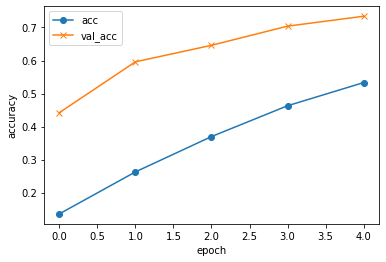

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=500, epochs=5,
                    verbose=1, validation_data=(X_test, y_test))


plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

In [17]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [18]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [20]:
# 모델 생성
model = Sequential()
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.compile(optimizer=sgd, loss="catrgorical_crossentropy", metrics="accuracy")

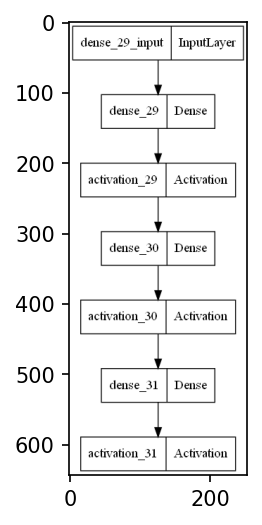

In [29]:
# 은닉층이 2개인 모델
from keras.utils.vis_utils import plot_model

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

plot_model(model, "model125.png", show_layer_names=True)
image = plt.imread("model125.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

In [30]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 256)               200960    
                                                                 
 activation_29 (Activation)  (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 activation_30 (Activation)  (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
 activation_31 (Activation)  (None, 10)                0         
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-t

Epoch 1/3
188/188 [==============================] - 1s 4ms/step - loss: 1.3495 - accuracy: 0.6362
Epoch 2/3
188/188 [==============================] - 1s 3ms/step - loss: 0.6458 - accuracy: 0.8430
Epoch 3/3
188/188 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.8828


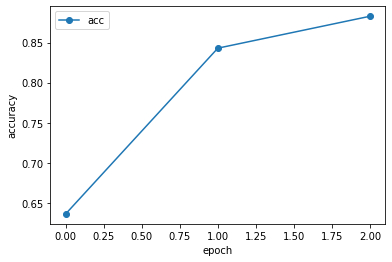

In [31]:
# 모델 훈련
history = model.fit(X_train, y_train, verbose=1, epochs=3)

plt.plot(history.history["accuracy"], label="acc", ls="-", marker="o")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

In [32]:
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=1)
print(f"evaluate loss: {score[0]}\nevaluate acc: {score[1]}")

32/32 [==============================] - 0s 9ms/step - loss: 0.5282 - accuracy: 0.8480
evaluate loss: 0.528221845626831
evaluate acc: 0.8479999899864197


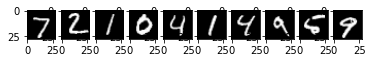

1/1 [==============================] - 0s 16ms/step
[7 2 1 0 4 1 4 9 6 9]


In [40]:
# 예측
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_test[i].reshape((28, 28)), "gray")
plt.show()

pred = np.argmax(model.predict(X_test[0:10]), axis=1)
print(pred)